# desarrollo en knn

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# importar archivos y verificarlos

In [9]:
df1 = pd.read_csv("Features data set.csv", sep=",")
df2 = pd.read_csv("sales data-set.csv", sep=",")
df_ventas_tienda = pd.read_csv("Tabla_1.csv")

In [10]:
df1. head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
df1.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [13]:
df1.describe(include = "all")

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,05/02/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


# limpiar datas NaN

In [15]:
df1.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [23]:
df1 = df1.fillna(0)

In [24]:
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,False


# UNION CON MERGE

In [26]:
df1.merge(df2, on="Store")

,Store,Date_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Date_y,Weekly_Sales,IsHoliday_y
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,05/02/2010,24924.50,False
1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,12/02/2010,46039.49,True
2,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,19/02/2010,41595.55,False
3,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,26/02/2010,19403.54,False
4,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,1,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76725735,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,False,98,28/09/2012,508.37,False
76725736,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,False,98,05/10/2012,628.10,False
76725737,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,False,98,12/10/2012,1061.02,False
76725738,45,26/07/2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,0.000000,0.000,False,98,19/10/2012,760.01,False


In [28]:
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,False


In [29]:
df_sample = df1.sample(n=100)

In [30]:
df_sample

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
2309,13,29/06/2012,82.00,3.681,4768.50,446.92,0.00,743.34,4076.02,130.756267,5.965,False
229,2,31/12/2010,47.30,2.943,0.00,0.00,0.00,0.00,0.00,211.064774,8.163,True
4155,23,28/12/2012,22.04,3.560,13285.54,28922.45,274.02,143.69,1233.63,138.488226,4.145,True
1147,7,25/02/2011,17.46,3.101,0.00,0.00,0.00,0.00,0.00,191.964717,8.818,False
7448,41,26/04/2013,35.73,3.568,800.62,5.96,196.18,64.24,2037.31,201.070571,5.639,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7227,40,27/07/2012,67.88,3.701,3351.06,156.53,4.24,1624.68,1605.34,138.203387,4.156,False
3836,22,14/05/2010,50.99,2.983,0.00,0.00,0.00,0.00,0.00,136.010394,8.348,False
7076,39,01/03/2013,54.16,3.711,14296.67,865.25,7.20,673.89,6867.11,223.237979,6.266,False
461,3,16/12/2011,57.95,3.159,1864.61,0.00,170.36,187.42,1500.38,222.642642,7.197,False


In [32]:
df = pd.get_dummies(df_sample, columns=["IsHoliday"], drop_first=True)

In [33]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_True
2309,13,29/06/2012,82.00,3.681,4768.50,446.92,0.00,743.34,4076.02,130.756267,5.965,0
229,2,31/12/2010,47.30,2.943,0.00,0.00,0.00,0.00,0.00,211.064774,8.163,1
4155,23,28/12/2012,22.04,3.560,13285.54,28922.45,274.02,143.69,1233.63,138.488226,4.145,1
1147,7,25/02/2011,17.46,3.101,0.00,0.00,0.00,0.00,0.00,191.964717,8.818,0
7448,41,26/04/2013,35.73,3.568,800.62,5.96,196.18,64.24,2037.31,201.070571,5.639,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7227,40,27/07/2012,67.88,3.701,3351.06,156.53,4.24,1624.68,1605.34,138.203387,4.156,0
3836,22,14/05/2010,50.99,2.983,0.00,0.00,0.00,0.00,0.00,136.010394,8.348,0
7076,39,01/03/2013,54.16,3.711,14296.67,865.25,7.20,673.89,6867.11,223.237979,6.266,0
461,3,16/12/2011,57.95,3.159,1864.61,0.00,170.36,187.42,1500.38,222.642642,7.197,0


In [35]:
df.isna().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
IsHoliday_True    0
dtype: int64

In [36]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_True
2309,13,29/06/2012,82.00,3.681,4768.50,446.92,0.00,743.34,4076.02,130.756267,5.965,0
229,2,31/12/2010,47.30,2.943,0.00,0.00,0.00,0.00,0.00,211.064774,8.163,1
4155,23,28/12/2012,22.04,3.560,13285.54,28922.45,274.02,143.69,1233.63,138.488226,4.145,1
1147,7,25/02/2011,17.46,3.101,0.00,0.00,0.00,0.00,0.00,191.964717,8.818,0
7448,41,26/04/2013,35.73,3.568,800.62,5.96,196.18,64.24,2037.31,201.070571,5.639,0


In [44]:
demo = df.describe(include="all")

In [62]:
print(df.columns)
print(df.shape)
print(df.head())
print(df.index.name)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_True'],
      dtype='object')
(100, 12)
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
2309     13  29/06/2012        82.00       3.681    4768.50     446.92   
229       2  31/12/2010        47.30       2.943       0.00       0.00   
4155     23  28/12/2012        22.04       3.560   13285.54   28922.45   
1147      7  25/02/2011        17.46       3.101       0.00       0.00   
7448     41  26/04/2013        35.73       3.568     800.62       5.96   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
2309       0.00     743.34    4076.02  130.756267         5.965   
229        0.00       0.00       0.00  211.064774         8.163   
4155     274.02     143.69    1233.63  138.488226         4.145   
1147       0.00       0.00       0.00  191.964717         8.818   
7448     196.1

In [63]:
#atributo
x = df.iloc[:,0:11].values
#vectorr de label
y = df["IsHoliday_True"]

In [66]:
demo = df

In [67]:
demo




,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_True
2309,13,29/06/2012,82.00,3.681,4768.50,446.92,0.00,743.34,4076.02,130.756267,5.965,0
229,2,31/12/2010,47.30,2.943,0.00,0.00,0.00,0.00,0.00,211.064774,8.163,1
4155,23,28/12/2012,22.04,3.560,13285.54,28922.45,274.02,143.69,1233.63,138.488226,4.145,1
1147,7,25/02/2011,17.46,3.101,0.00,0.00,0.00,0.00,0.00,191.964717,8.818,0
7448,41,26/04/2013,35.73,3.568,800.62,5.96,196.18,64.24,2037.31,201.070571,5.639,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7227,40,27/07/2012,67.88,3.701,3351.06,156.53,4.24,1624.68,1605.34,138.203387,4.156,0
3836,22,14/05/2010,50.99,2.983,0.00,0.00,0.00,0.00,0.00,136.010394,8.348,0
7076,39,01/03/2013,54.16,3.711,14296.67,865.25,7.20,673.89,6867.11,223.237979,6.266,0
461,3,16/12/2011,57.95,3.159,1864.61,0.00,170.36,187.42,1500.38,222.642642,7.197,0


In [68]:
demo = demo.drop("Date", axis=1)

In [69]:
demo

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_True
2309,13,82.00,3.681,4768.50,446.92,0.00,743.34,4076.02,130.756267,5.965,0
229,2,47.30,2.943,0.00,0.00,0.00,0.00,0.00,211.064774,8.163,1
4155,23,22.04,3.560,13285.54,28922.45,274.02,143.69,1233.63,138.488226,4.145,1
1147,7,17.46,3.101,0.00,0.00,0.00,0.00,0.00,191.964717,8.818,0
7448,41,35.73,3.568,800.62,5.96,196.18,64.24,2037.31,201.070571,5.639,0
...,...,...,...,...,...,...,...,...,...,...,...
7227,40,67.88,3.701,3351.06,156.53,4.24,1624.68,1605.34,138.203387,4.156,0
3836,22,50.99,2.983,0.00,0.00,0.00,0.00,0.00,136.010394,8.348,0
7076,39,54.16,3.711,14296.67,865.25,7.20,673.89,6867.11,223.237979,6.266,0
461,3,57.95,3.159,1864.61,0.00,170.36,187.42,1500.38,222.642642,7.197,0


In [71]:
x = demo.iloc[:,0:11].values
#vectorr de label
y = demo["IsHoliday_True"]

In [72]:
demo["IsHoliday_True"].nunique()

2

In [74]:
x = StandardScaler().fit_transform(x)
x

array([[-0.7033588 ,  1.33948689,  0.59575097, ..., -0.64683012,
        -0.57441029, -0.33333333],
       [-1.56111342, -0.54784211, -1.24987162, ...,  0.84116602,
         0.32341853,  3.        ],
       [ 0.07641814, -1.9217306 ,  0.29314889, ..., -0.50356852,
        -1.31783544,  3.        ],
       ...,
       [ 1.32406124, -0.1747275 ,  0.67077628, ...,  1.06671725,
        -0.45145921, -0.33333333],
       [-1.48313573,  0.03141016, -0.7096894 , ...,  1.05568654,
        -0.07116866, -0.33333333],
       [ 0.46630661, -0.23074909,  1.2684779 , ..., -0.6506481 ,
         1.96712335, -0.33333333]])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [76]:
classi = KNeighborsClassifier(n_neighbors=5, weights="distance", algorithm="kd_tree")
classi.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [79]:
y_pred = classi.predict(X_test)

In [80]:
print("Acucuracy  %.3f" % (metrics.accuracy_score(y_test, y_pred)*100), "%")

Acucuracy  86.667 %


In [81]:
# buscador mejor K

In [85]:
err = list()
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i, weights="distance", algorithm="kd_tree")
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    err.append(np.mean(y_pred_i != y_test))


In [87]:
#plot en la busqueda del mejor K

Text(0, 0.5, 'mean error')

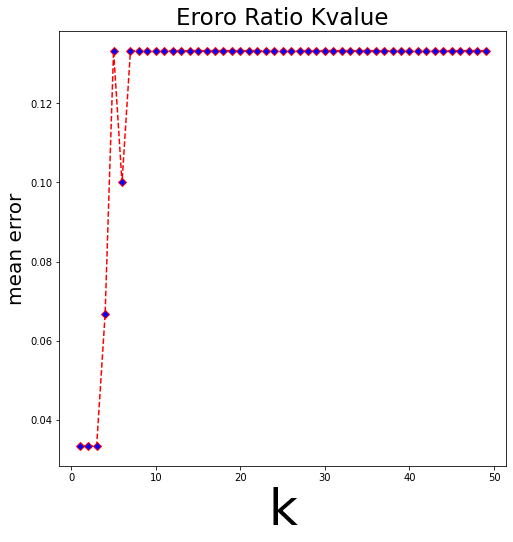

In [93]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

ax.plot(range(1,50), err, color="red", linestyle="dashed", marker="D",
       markerfacecolor="blue", markersize=5)
ax.set_title("Eroro Ratio Kvalue", fontsize=23)
ax.set_xlabel("k", fontsize=50)
ax.set_ylabel("mean error", fontsize=20)

# ### Intente modificar el arhivo aun asi tenia muchas dudas sobre el trabajo con fechas ya que la idea era presentar datos de ventas por semana y que inflye los dias feriados. pero no pude trabajar con datetime y pasarlos a int 